In [1]:
import os
import pandas as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import joblib
from matplotlib.colors import ListedColormap

plt.style.use("fivethirtyeight")


In [2]:
class Perceptron:
    def __init__(self,eta:float=None,epochs: int=None):
        self.weights = np.random.randn(3)*1e-4  # small random weight
        is_training = (eta is not None) and (epochs is not None)
        if is_training:
            print(f"initial weights before weights: \n{self.weights}")
        
        self.eta = eta
        self.epochs =epochs
        
    
    def _z_outcome(self,inputs,weights):
        return np.dot(inputs,weights)
    
    
    def activation_function(self,z):
        return np.where(z>0,1,0)
    
    def fit(self,X,y):
        self.X=X
        self.y=y
        
        X_with_bias = np.c_[self.X,-np.ones((len(self.X),1))]
        print(f"X with bias: \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            print("--"*10)
            print(f"for  epoch >> {epoch}")
            print("--"*10)
            
            z=self._z_outcome(X_with_bias,self.weights)
            y_hat = self.activation_function(z)
            print(f"predicted value after forward pass:  \n{y_hat}")
            
            self.error = self.y - y_hat
            print(f"error: \n{self.error}")
            
            self.weights = self.weights + self.eta * np.dot(X_with_bias.T,self.error)
            print(f"updated weights after epoch: {epoch+1}/{self.epochs}: \n {self.weights}")
            print("##"*10)
    
    
    def predict(self,test_input):
        X_with_bias = np.c_[test_input,-np.ones((len(test_input),1))]
        z = self._z_outcome(X_with_bias,self.weights)
        return self.activation_function(z)
        
    
    def total_loss(self):
        total_loss = np.sum(self.error)
        print(f"\n total loss: {total_loss}\n")
        return total_loss
        
    
    def _create_dir_return_path(self,model_dir,filename):
        os.makedirs(model_dir,exist_ok=True)
        return os.path.join(model_dir,filename)
    
    def save(self,filename,model_dir=None):
        if model_dir is not None:
            model_file_path = self._create_dir_return_path(model_dir,filename)
            joblib.dump(self,model_file_path)
        else:
            model_file_path =self._create_dir_return_path("model",filename)
            joblib.dump(self,model_file_path)
    
    def load(self,filepath):
        return joblib.load(filepath)
    
    
    

In [3]:
import pandas as pd

AND = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,0,0,1]
}

df_AND = pd.DataFrame(AND)
df_AND

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [4]:
def prepare_data(df):
    X=df.drop("y",axis=1)
    
    y = df['y']
    
    return X,y

In [5]:
X,y = prepare_data(df_AND)

ETA = 0.1

EPOCHS = 10

model_and = Perceptron(eta=ETA,epochs=EPOCHS)
model_and.fit(X,y)

_ = model_and.total_loss()

initial weights before weights: 
[-6.54678288e-05 -6.18516888e-05 -3.38300898e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for  epoch >> 0
--------------------
predicted value after forward pass:  
[1 0 0 0]
error: 
0   -1
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
 [ 9.99345322e-02  9.99381483e-02 -3.38300898e-05]
####################
--------------------
for  epoch >> 1
--------------------
predicted value after forward pass:  
[1 1 1 1]
error: 
0   -1
1   -1
2   -1
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
 [-6.54678288e-05 -6.18516888e-05  2.99966170e-01]
####################
--------------------
for  epoch >> 2
--------------------
predicted value after forward pass:  
[0 0 0 0]
error: 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
updated weights after epoch: 3/10: 
 [0.09993453 0.09993815 0.19996617]
####################
--------------------
for  epoch >> 3
----

In [6]:
model_and.save(filename="and.model")

In [7]:
reload_and = Perceptron().load(filepath="model/and.model")

In [8]:
reload_and.predict([[1,0]])

array([0])

In [9]:
OR = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,1]
}

df_OR = pd.DataFrame(OR)
df_OR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [10]:
X,y = prepare_data(df_OR)

ETA = 0.1

EPOCHS = 10

model_or = Perceptron(eta=ETA,epochs=EPOCHS)
model_or.fit(X,y)

_ = model_or.total_loss()

initial weights before weights: 
[ 6.90717119e-05 -1.74032552e-05  1.27487625e-04]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for  epoch >> 0
--------------------
predicted value after forward pass:  
[0 0 0 0]
error: 
0    0
1    1
2    1
3    1
Name: y, dtype: int64
updated weights after epoch: 1/10: 
 [ 0.20006907  0.1999826  -0.29987251]
####################
--------------------
for  epoch >> 1
--------------------
predicted value after forward pass:  
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 2/10: 
 [ 0.20006907  0.1999826  -0.19987251]
####################
--------------------
for  epoch >> 2
--------------------
predicted value after forward pass:  
[1 1 1 1]
error: 
0   -1
1    0
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
 [ 0.20006907  0.1999826  -0.09987251]
####################
--------------------
for  epoch >> 3
--------------------
pred

In [11]:
XOR = {
    "x1":[0,0,1,1],
    "x2":[0,1,0,1],
    "y":[0,1,1,0]
}

df_XOR = pd.DataFrame(XOR)
df_XOR

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [12]:
X,y = prepare_data(df_XOR)

ETA = 0.1

EPOCHS = 10

model_xor = Perceptron(eta=ETA,epochs=EPOCHS)
model_xor.fit(X,y)

_ = model_xor.total_loss()

initial weights before weights: 
[ 1.87053283e-05 -9.98789559e-05 -1.55414042e-05]
X with bias: 
[[ 0.  0. -1.]
 [ 0.  1. -1.]
 [ 1.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for  epoch >> 0
--------------------
predicted value after forward pass:  
[1 0 1 0]
error: 
0   -1
1    1
2    0
3    0
Name: y, dtype: int64
updated weights after epoch: 1/10: 
 [ 1.87053283e-05  9.99001210e-02 -1.55414042e-05]
####################
--------------------
for  epoch >> 1
--------------------
predicted value after forward pass:  
[1 1 1 1]
error: 
0   -1
1    0
2    0
3   -1
Name: y, dtype: int64
updated weights after epoch: 2/10: 
 [-9.99812947e-02 -9.98789559e-05  1.99984459e-01]
####################
--------------------
for  epoch >> 2
--------------------
predicted value after forward pass:  
[0 0 0 0]
error: 
0    0
1    1
2    1
3    0
Name: y, dtype: int64
updated weights after epoch: 3/10: 
 [ 1.87053283e-05  9.99001210e-02 -1.55414042e-05]
####################
--------------------
for  

In [13]:

#  for XOR , the loss is not decreasing, the reseaon being perceptron class
# works for linear models only now. not for the non linear like XOR.

In [17]:
def save_plot(df,model,filename="plot.png",plot_dir = "plots"):
    
    def _create_base_plot(df):
        df.plot(kind="scatter",x="x1",y="x2",c="y",s=100,cmap="coolwarm")
        plt.axhline(y=0,color="black",linestyle="--",linewidth=1)
        plt.axvline(x=0,color="black",linestyle="--",linewidth=1)
        
        figure = plt.gcf()
        figure.set_size_inches(10,8)
        
        
    
    def _plot_decision_region(X,y,classifier,resolution=0.02):
        colors=("cyan","lightgreen")
        cmap = ListedColormap(colors)
        X=X.values # as an array
        x1=X[:,0]
        x2=X[:,1]
        
        x1_min,x1_max = x1.min()-1,x1.max()+1
        x2_min,x2_max = x2.min()-1,x2.max()+1
        
        xx1,xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                             np.arange(x2_min,x2_max,resolution))
        
        y_hat = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
        y_hat = y_hat.reshape(xx1.shape)
        
        plt.contourf(xx1,xx2,y_hat,alpha=0.3,cmap=cmap)
        plt.xlim(xx1.min(),xx1.max())
        plt.ylim(xx2.min(),xx2.max())
        
        plt.plot()
        
        
    
    X,y = prepare_data(df)
    
    _create_base_plot(df)
    _plot_decision_region(X,y,model)
    
    os.makedirs(plot_dir,exist_ok=True)
    plot_path = os.path.join(plot_dir,filename)
    plt.savefig(plot_path)
    
    
    

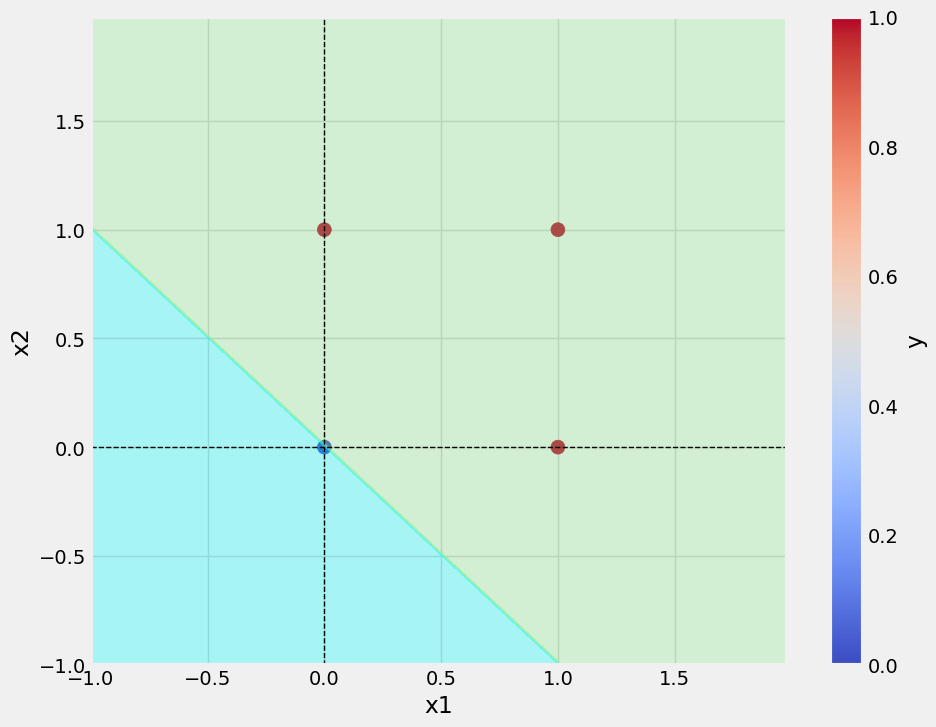

In [18]:
save_plot(df_OR,model_or,filename="or.png")

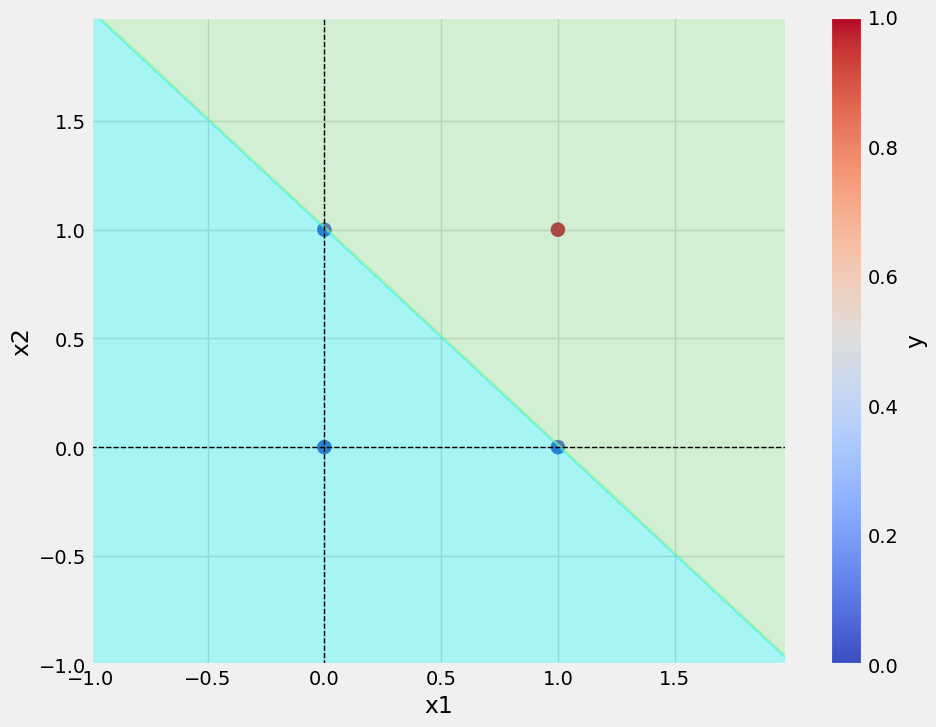

In [19]:
save_plot(df_AND,model_and,filename="and.png")

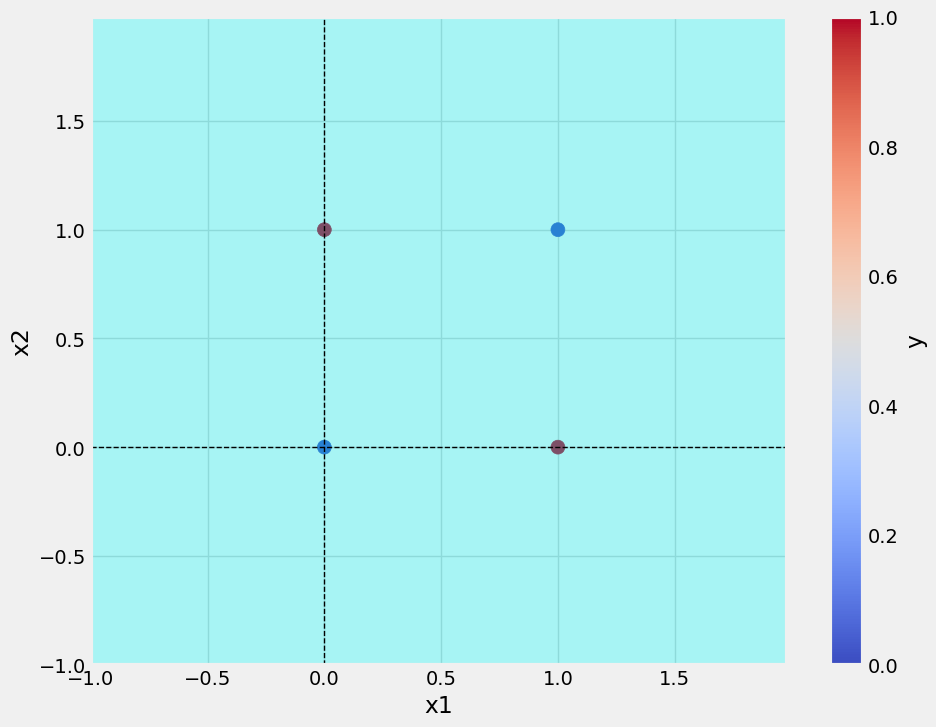

In [20]:
save_plot(df_XOR,model_xor,filename="xor.png")

In [21]:
# here in the XOR graph there is no convergence , here single perceptron fails to 
# to solve it we can use ANN -- multi layered perceptron